#**Basic information**

https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay?select=airlines_delay.csv

*   Flight - Flight ID 
*   Time - Time of departure
*   Length - Length of Flight
*   Airline - Airline ID
*   AirportFrom - Which airport the flight flew from
*   AirportTo - Which airport the flight flew to
*   DayOfWeek - Day of the week of the flight
*   Class - Delayed (1) or not (0)


#**Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#**Read Dataset**

In [4]:
df_all=pd.read_csv("airlines_delay (1).csv")

In [5]:
df_all.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [6]:
df_all.tail()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1
539381,6377.0,770.0,55.0,OO,CPR,DEN,2,1


#**EDA**

In [7]:
df_all.shape

(539382, 8)

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


##**Checking the characteristic values ​​**

In [9]:
df_all.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


▶ Handling Duplicate Values

In [10]:
df_all.nunique()

Flight         6585
Time           1131
Length          426
Airline          18
AirportFrom     293
AirportTo       293
DayOfWeek         7
Class             2
dtype: int64

▶ Count the number of instances in each class

In [11]:
counts_class = df_all['Class'].value_counts()
print(counts_class)

0    299118
1    240264
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

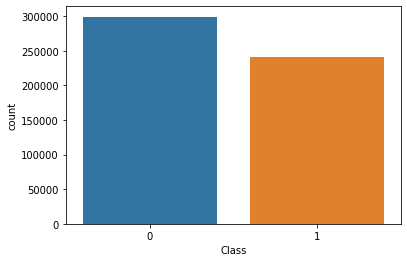

In [12]:
sns.countplot(data=df_all,x="Class")

In [13]:
class_cal = (df_all["Class"].value_counts() / df_all["Class"].value_counts().sum()) * 100
class_cal

0    55.455688
1    44.544312
Name: Class, dtype: float64

##**Data visualization**

<Axes: xlabel='Airline', ylabel='count'>

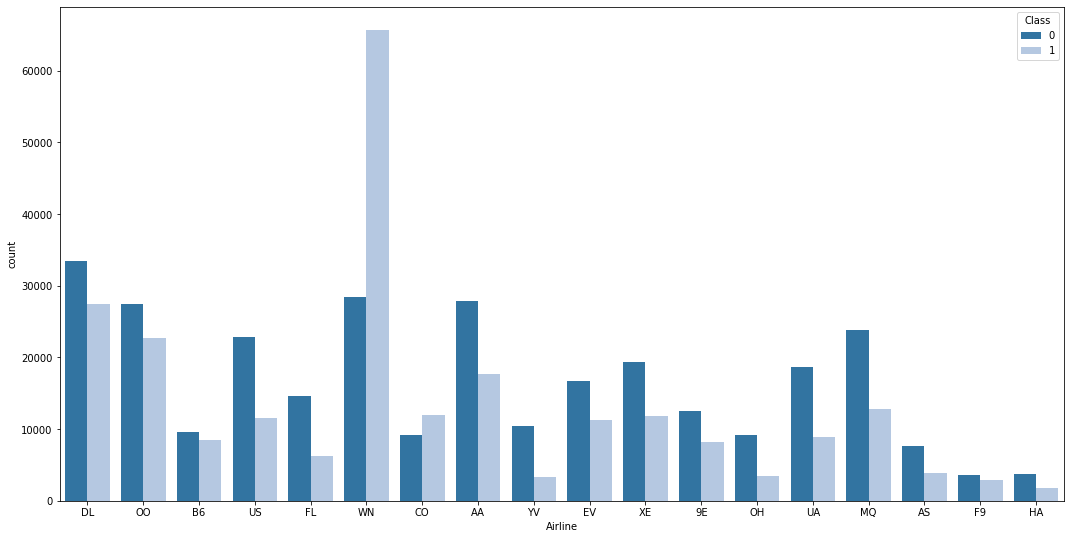

In [15]:
plt.figure(figsize = (18,20))
arline_group = df_all.groupby('Airline')
plt.subplot(2,1,1)
sns.countplot(x = 'Airline', hue= 'Class', palette='tab20', data = df_all)

<Axes: xlabel='DayOfWeek', ylabel='count'>

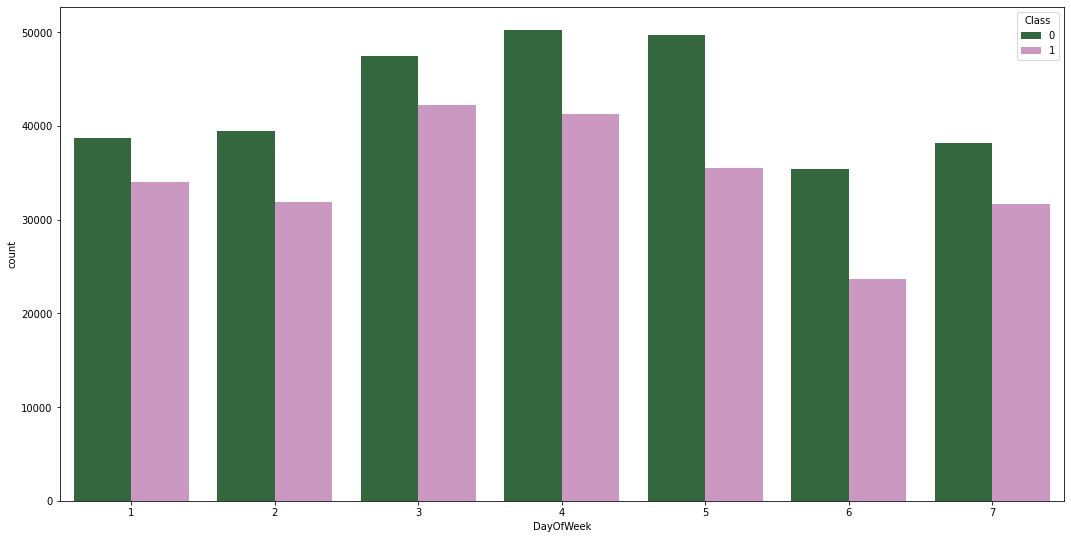

In [16]:
plt.figure(figsize = (18,20))
plt.subplot(2,1,2)
sns.countplot(x = 'DayOfWeek', hue= 'Class', palette='cubehelix', data = df_all)

<Axes: xlabel='DayOfWeek', ylabel='count'>

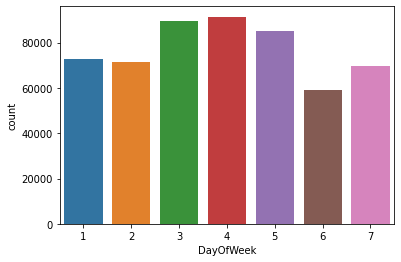

In [14]:
DayOfWeekOrder = list(range(1,8))
sns.countplot(x='DayOfWeek',data=df_all,order=DayOfWeekOrder,)

#**Data Processing**

In [17]:
df_grouped = df_all.groupby(['AirportFrom', 'AirportTo']).agg({'Length': ['mean', 'max', 'min']})
df_grouped

Length              
                             mean    max    min
AirportFrom AirportTo                          
ABE         ATL        153.032258  163.0  145.0
            CLT        106.000000  106.0  106.0
            DTW        112.588235  115.0  110.0
            FLL        178.000000  178.0  178.0
            MCO        156.000000  156.0  156.0
...                           ...    ...    ...
YAK         CDV         52.000000   52.0   52.0
            JNU         46.642857   48.0   46.0
YUM         IPL         27.000000   27.0   27.0
            LAX         79.319328   80.0   77.0
            PHX         66.803191   74.0   54.0

[4190 rows x 3 columns]

In [18]:
X = df_all[['Time','AirportFrom','AirportTo','Airline','DayOfWeek']].copy()
X

,Time,AirportFrom,AirportTo,Airline,DayOfWeek
0,1296.0,ATL,HOU,DL,1
1,360.0,COS,ORD,OO,4
2,1170.0,BOS,CLT,B6,3
3,1410.0,OGG,PHX,US,6
4,692.0,BMI,ATL,FL,4
...,...,...,...,...,...
539377,530.0,GEG,SEA,OO,5
539378,560.0,LAS,DEN,WN,4
539379,827.0,CAE,ATL,EV,2
539380,715.0,BWI,BUF,WN,4


In [19]:
y = df_all['Class'].copy()
y

0         0
1         0
2         0
3         0
4         0
         ..
539377    1
539378    1
539379    1
539380    1
539381    1
Name: Class, Length: 539382, dtype: int64

In [20]:
X

,Time,AirportFrom,AirportTo,Airline,DayOfWeek
0,1296.0,ATL,HOU,DL,1
1,360.0,COS,ORD,OO,4
2,1170.0,BOS,CLT,B6,3
3,1410.0,OGG,PHX,US,6
4,692.0,BMI,ATL,FL,4
...,...,...,...,...,...
539377,530.0,GEG,SEA,OO,5
539378,560.0,LAS,DEN,WN,4
539379,827.0,CAE,ATL,EV,2
539380,715.0,BWI,BUF,WN,4


In [21]:
X_transformed = X.copy()
X_transformed = pd.get_dummies(X_transformed, columns=['AirportFrom','AirportTo','Airline','DayOfWeek'])

X_transformed

,Time,AirportFrom_ABE,AirportFrom_ABI,AirportFrom_ABQ,AirportFrom_ABR,AirportFrom_ABY,AirportFrom_ACT,AirportFrom_ACV,AirportFrom_ACY,AirportFrom_ADK,...,Airline_WN,Airline_XE,Airline_YV,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,1296.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,360.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1170.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1410.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,692.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539377,530.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
539378,560.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
539379,827.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
539380,715.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [22]:
X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(X_transformed, y, test_size =0.2, random_state = 333, stratify=y)

In [23]:
X_transformed_train.shape

(431505, 612)

In [24]:
X_transformed_test.shape

(107877, 612)

# Modelowanie

## DummyClassifier

In [28]:
from sklearn.dummy import DummyClassifier

In [29]:
model_dm = DummyClassifier()

In [30]:
model_dm.fit(X_transformed_train, y_train)

DummyClassifier()

In [31]:
y_pred_test_dm = model_dm.predict(X_transformed_test)

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
pipe_dm = Pipeline( steps = [('model',  DummyClassifier())
    ])

In [34]:
pipe_dm.get_params()

{'memory': None,
 'steps': [('model', DummyClassifier())],
 'verbose': False,
 'model': DummyClassifier(),
 'model__constant': None,
 'model__random_state': None,
 'model__strategy': 'prior'}

In [35]:
parameters_dm = {
    'model__strategy':  ('most_frequent', 'prior', 'stratified', 'uniform', 'constant')
    }

In [36]:
clf = GridSearchCV(pipe_dm, parameters_dm, verbose = 3)

In [37]:
clf.fit(X_transformed_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....model__strategy=most_frequent;, score=0.555 total time=   2.2s
[CV 2/5] END .....model__strategy=most_frequent;, score=0.555 total time=   1.9s
[CV 3/5] END .....model__strategy=most_frequent;, score=0.555 total time=   2.0s
[CV 4/5] END .....model__strategy=most_frequent;, score=0.555 total time=   2.9s
[CV 5/5] END .....model__strategy=most_frequent;, score=0.555 total time=   2.3s
[CV 1/5] END .............model__strategy=prior;, score=0.555 total time=   1.9s
[CV 2/5] END .............model__strategy=prior;, score=0.555 total time=   1.9s
[CV 3/5] END .............model__strategy=prior;, score=0.555 total time=   2.0s
[CV 4/5] END .............model__strategy=prior;, score=0.555 total time=   1.9s
[CV 5/5] END .............model__strategy=prior;, score=0.555 total time=   3.0s
[CV 1/5] END ........model__strategy=stratified;, score=0.507 total time=   2.1s
[CV 2/5] END ........model__strategy=stratified;,

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/dummy.py", line 196, in fit
    raise ValueError(
ValueError: Constant target value has to be specified when the const

GridSearchCV(estimator=Pipeline(steps=[('model', DummyClassifier())]),
             param_grid={'model__strategy': ('most_frequent', 'prior',
                                             'stratified', 'uniform',
                                             'constant')},
             verbose=3)

In [38]:
clf.best_estimator_

Pipeline(steps=[('model', DummyClassifier(strategy='most_frequent'))])

In [39]:
model_dm_with_grid = DummyClassifier(strategy='most_frequent')

In [40]:
model_dm_with_grid.fit(X_transformed_train, y_train)

DummyClassifier(strategy='most_frequent')

In [41]:
y_pred_test_dm_grid = model_dm_with_grid.predict(X_transformed_test)

## Regresja logistyczna

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model_lr = LogisticRegression()

In [44]:
model_lr.fit(X_transformed_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred_test_lr = model_lr.predict(X_transformed_test)

In [46]:
pipe_lr = Pipeline( steps = [('model',  LogisticRegression())
    ])

In [47]:
pipe_lr.get_params()

{'memory': None,
 'steps': [('model', LogisticRegression())],
 'verbose': False,
 'model': LogisticRegression(),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [63]:
parameters_lr = {
    'model__penalty':['l1', 'l2', 'elasticnet', None]
    }

In [64]:
clf_lr = GridSearchCV(pipe_lr, parameters_lr, verbose = 3)

In [ ]:
clf_lr.fit(X_transformed_train, y_train)

[CV 1/5] END ...................model__penalty=l1;, score=nan total time=   7.0s
[CV 2/5] END ...................model__penalty=l1;, score=nan total time=   3.9s
[CV 3/5] END ...................model__penalty=l1;, score=nan total time=   2.0s
[CV 4/5] END ...................model__penalty=l1;, score=nan total time=   2.1s
[CV 5/5] END ...................model__penalty=l1;, score=nan total time=   3.3s
[CV 1/5] END .................model__penalty=l2;, score=0.639 total time= 1.1min
[CV 2/5] END .................model__penalty=l2;, score=0.637 total time=  49.4s
[CV 3/5] END .................model__penalty=l2;, score=0.631 total time=  16.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END .................model__penalty=l2;, score=0.640 total time=  55.7s
[CV 5/5] END .................model__penalty=l2;, score=0.637 total time=  34.1s
[CV 1/5] END ...........model__penalty=elasticnet;, score=nan total time=   2.0s
[CV 2/5] END ...........model__penalty=elasticnet;, score=nan total time=   2.5s
[CV 3/5] END ...........model__penalty=elasticnet;, score=nan total time=   3.2s
[CV 4/5] END ...........model__penalty=elasticnet;, score=nan total time=   2.0s
[CV 5/5] END ...........model__penalty=elasticnet;, score=nan total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...............model__penalty=None;, score=0.639 total time= 1.0min


In [51]:
clf_lr.best_estimator_

Pipeline(steps=[('model', LogisticRegression())])

In [66]:
model_lr_with_grid = LogisticRegression(penalty=None)

In [67]:
model_lr_with_grid.fit(X_transformed_train, y_train)

LogisticRegression(penalty=None)

In [68]:
y_pred_test_lr_grid = model_lr_with_grid.predict(X_transformed_test)

### Catboost

In [55]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from catboost import CatBoostClassifier
from sklearn import metrics

In [57]:
 model_cbc = CatBoostClassifier()

In [58]:
model_cbc.fit(X_transformed_train, y_train)

Learning rate set to 0.137427
0:	learn: 0.6784359	total: 251ms	remaining: 4m 11s
1:	learn: 0.6679568	total: 477ms	remaining: 3m 58s
2:	learn: 0.6597830	total: 664ms	remaining: 3m 40s
3:	learn: 0.6539652	total: 880ms	remaining: 3m 39s
4:	learn: 0.6493231	total: 1.12s	remaining: 3m 43s
5:	learn: 0.6459996	total: 1.29s	remaining: 3m 34s
6:	learn: 0.6434023	total: 1.49s	remaining: 3m 31s
7:	learn: 0.6413016	total: 1.81s	remaining: 3m 44s
8:	learn: 0.6395829	total: 2.03s	remaining: 3m 43s
9:	learn: 0.6381690	total: 2.29s	remaining: 3m 47s
10:	learn: 0.6370490	total: 2.6s	remaining: 3m 54s
11:	learn: 0.6360929	total: 2.97s	remaining: 4m 4s
12:	learn: 0.6353286	total: 3.26s	remaining: 4m 7s
13:	learn: 0.6346000	total: 3.58s	remaining: 4m 12s
14:	learn: 0.6339305	total: 3.94s	remaining: 4m 18s
15:	learn: 0.6334697	total: 4.25s	remaining: 4m 21s
16:	learn: 0.6329419	total: 4.57s	remaining: 4m 24s
17:	learn: 0.6324904	total: 4.91s	remaining: 4m 28s
18:	learn: 0.6321763	total: 5.2s	remaining: 4m 

In [98]:
print(model_cbc)

In [99]:
expected_y  = y_test
predicted_y = model_cbc.predict(X_transformed_test)

In [100]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73     59824
           1       0.67      0.50      0.57     48053

    accuracy                           0.67    107877
   macro avg       0.67      0.65      0.65    107877
weighted avg       0.67      0.67      0.66    107877

[[47945 11879]
 [24075 23978]]


# Ewaluacja

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

## Metryka dla DummyClassifier

In [70]:
accuracy_score(y_test, y_pred_test_dm)

0.55455750530697

In [71]:
f1_score(y_test, y_pred_test_dm)

0.0

In [72]:
recall_score(y_test, y_pred_test_dm)

0.0

In [73]:
precision_score(y_test, y_pred_test_dm)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

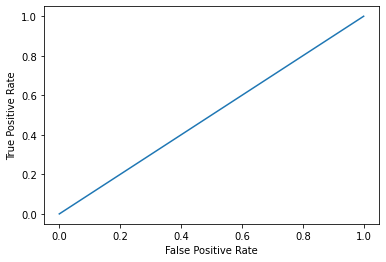

In [74]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test_dm)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

In [75]:
roc_auc_score(y_test, y_pred_test_dm)

0.5

#### po zmianie parametrow

In [87]:
accuracy_score(y_test, y_pred_test_dm_grid)

0.55455750530697

In [88]:
f1_score(y_test, y_pred_test_dm_grid)

0.0

In [89]:
recall_score(y_test, y_pred_test_dm_grid)

0.0

In [90]:
precision_score(y_test, y_pred_test_dm_grid)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

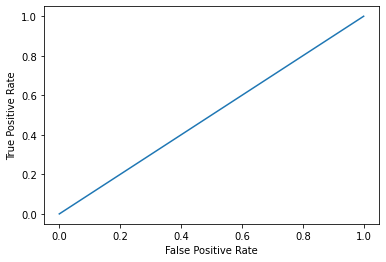

In [77]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test_dm_grid)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

In [78]:
roc_auc_score(y_test, y_pred_test_dm_grid)

0.5

## Metryka dla LogisticRegression

In [79]:
accuracy_score(y_test, y_pred_test_lr)

0.6379024259109912

In [80]:
f1_score(y_test, y_pred_test_lr)

0.536971622294398

In [81]:
recall_score(y_test, y_pred_test_lr)

0.4713545460221006

In [82]:
precision_score(y_test, y_pred_test_lr)

0.6238122779476163

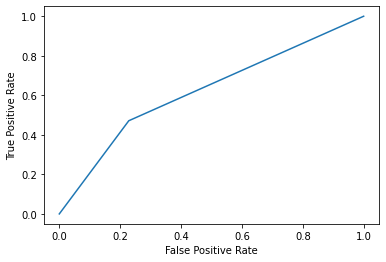

In [83]:
fpr, tpr, _ = roc_curve(y_test,y_pred_test_lr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

In [97]:
roc_auc_score(y_test, y_pred_test_lr)

0.6215174040621334

#### po zmianie parametrow

In [91]:
accuracy_score(y_test, y_pred_test_lr_grid)

0.6397378495879567

In [92]:
f1_score(y_test,  y_pred_test_lr_grid)

0.5399076595240914

In [95]:
recall_score(y_test,  y_pred_test_lr_grid)

0.4745385303727135

In [96]:
precision_score(y_test,  y_pred_test_lr_grid)

0.6261636049097948

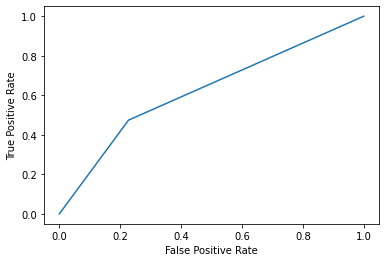

In [93]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test_lr_grid)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

In [94]:
roc_auc_score(y_test,  y_pred_test_lr_grid)

0.6234854994735993